In [1]:
import nibabel as nib
from scipy.ndimage import zoom
from nilearn import image
import matplotlib.pyplot as plt
from nilearn import plotting
import os

In [2]:
#move to data folder
os.chdir('/project/4180000.23/fMRI_Wessel/DR_5HT/Smoothed_maps/') 

In [6]:
#Create binary masks
prior = image.load_img('proj_den_merged.nii.gz')
prior_mask = image.math_img('img > 0', img=prior)
prior_mask.to_filename('proj_den_merged_bin.nii.gz')

In [28]:
mask = image.load_img('5HTR7_exp.nii.gz')
affine_template = image.load_img('affine_DSURQE_average.nii.gz')

In [29]:
mask_data = mask.get_fdata()

In [30]:
affine_data = affine_template.get_fdata()

In [31]:
#Reshape the prior maps and save to new image (the priors (DSURQE) are not in the same shape as our data)
print(mask_data.shape, affine_data.shape)

(41, 63, 32) (126, 191, 96)


In [32]:
mask_zoom = zoom(mask_data, (3.07, 3.03, 3.015))
mask_zoom.shape

(126, 191, 96)

In [33]:
mask_data_img = nib.Nifti1Image(mask_zoom, affine_template.affine) 
nib.save(mask_data_img, '5HTR7_exp_zoom_aff.nii.gz')

In [9]:
# Load your stat map and mask
stat_img_R6 = image.load_img('5HTR6_exp_zoom_aff.nii.gz')
stat_img_R7 = image.load_img('5HTR7_exp_zoom_aff.nii.gz')
mask_img = image.load_img('DSURQE_100micron_mask.nii.gz')

# Apply mask by multiplying (NaNs will be handled properly in plotting)
masked_stat_img_R6 = image.math_img('img1 * img2', img1=stat_img_R6, img2=mask_img)
masked_stat_img_R7 = image.math_img('img1 * img2', img1=stat_img_R7, img2=mask_img)

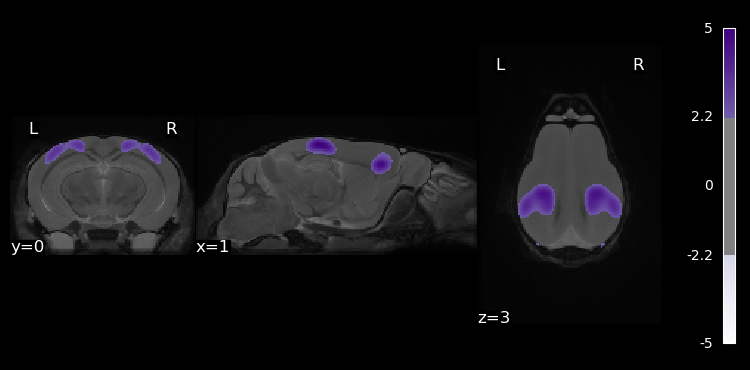

In [8]:
plotting.plot_stat_map(stat_map_img= masked_stat_img_R6, 
                       bg_img= 'affine_DSURQE_average.nii.gz', 
                       display_mode='ortho',
                       cut_coords=(1.5,-0.5,3), 
                       threshold= 2.2,
                       vmax= 5, 
                       draw_cross=False,
                       cmap='Purples')

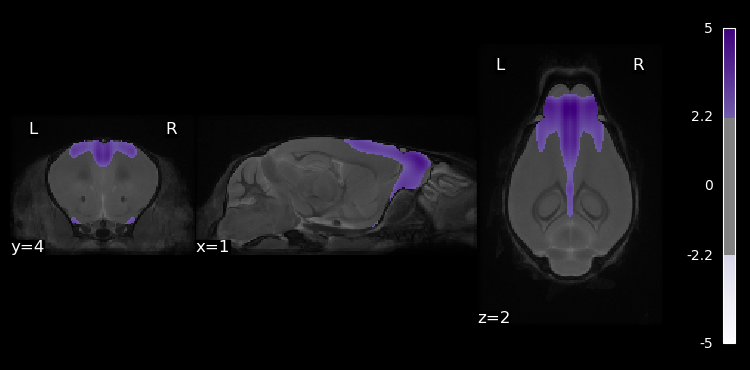

In [12]:
plotting.plot_stat_map(stat_map_img= masked_stat_img_R7, 
                       bg_img= 'affine_DSURQE_average.nii.gz', 
                       display_mode='ortho',
                       cut_coords=(1.5,4,2.5), 
                       threshold= 2.2,
                       vmax= 5, 
                       draw_cross=False,
                       cmap='Purples')